## Trying manual tokenization

In [516]:
# pip install keras, keras-bert

In [517]:
# pip install tensorflow

In [518]:
# # coding: utf-8
# import sys
# import codecs
# import numpy as np
# from keras_bert import load_trained_model_from_checkpoint
# import bert.tokenization as tokenization
# import os

In [519]:
# config_json = {
#     "bert": 'C:\\Users\dannu\\bert-base',
# }
# config_json['bert_config'] = os.path.join(config_json['bert'], 'bert_config.json')
# config_json['checkpoint'] = os.path.join(config_json['bert'], 'bert_model.ckpt')
# config_json['vocab'] = os.path.join(config_json['bert'], 'vocab.txt')

In [520]:
# tokenizer = tokenization.FullTokenizer(vocab_file=config_json['vocab'], do_lower_case=False)

In [521]:
# tokens = tokenizer.tokenize("""
# The sun is nearly gone
# The lights are turning on
# A silver shine that stretches to the sea
# We've stumbled on a view
# That's tailor-made for two
# What a shame those two are you and me
# Some other girl and guy
# Would love this swirling sky
# But there's only you and I
# And we've got no shot
# This could never be
# You're not the type for me (really?)
# And there's not a spark in sight
# What a waste of a lovely night
# You say there's nothing here?
# Well, let's make something clear
# I think I'll be the one to make that call (but you'll call?)
# And though you looked so cute
# In your polyester suit (it's wool)
# You're right, I'd never fall for you at all
# And maybe this appeals
# To someone not in heels
# Or to any girl who feels
# There's some chance for romance
# But, I'm frankly feeling nothing
# Is that so?
# Or it could be less than nothing
# Good to know, so you agree?
# That's right
# What a waste of a lovely night
# """)

In [522]:
# token_input = tokenizer.convert_tokens_to_ids(tokens)   

In [523]:
# token_input

In [524]:
# tokenizer.convert_tokens_to_ids(["king"]) 

In [525]:
# tokenizer.convert_tokens_to_ids(["queen"])[0] - tokenizer.convert_tokens_to_ids("woman") [0]

## Actually, i'd rather try old thing, but a better version of it

In [526]:
# pip install sentence_transformers

In [2]:
tnames = [
    # "all-MiniLM-L12-v2",
    # "distiluse-base-multilingual-cased-v2",
    # "paraphrase-multilingual-MiniLM-L12-v2",
    # "all-distilroberta-v1",
    # "all-mpnet-base-v2",
    "multi-qa-mpnet-base-dot-v1"
]

### Extracting downloaded data

In [3]:
from dataclasses import dataclass
import os
import config
import json
import numpy as np


@dataclass
class Song:
    lyrics: np.array
    name: str
    artist: str
    meta: list


def dict_to_list_fixed(d):
    tmp = list(d.items())
    tmp.sort()
    return [i[1] for i in tmp]


In [4]:
import tqdm
remake = False
if remake:
    data = []
    for name in tnames:
        part = []
        dir = config.SONG_DATA_PATH + "_lyrics-" + name
        for file in tqdm.tqdm(os.listdir(dir)):
            with open(os.path.join(dir, file), 'r') as f:
                cur = json.load(f)
                for el in cur:
                    part.append(Song(np.array(el['lyrics']), el['song'], el['artist'], el['meta']))
                    # print(el['meta'])
                    # break
        data.append(part)
else:
    pass

100%|██████████| 125/125 [00:56<00:00,  2.20it/s]


In [5]:
len(data[0])

124132

In [6]:
if remake:
    lyrics = [
        np.array([el.lyrics for el in data[0]]) for i in range(len(data))
    ]

In [74]:
lyrics

[array([[ 0.0967151 ,  0.22547984, -0.11201283, ...,  0.05589876,
          0.25367513, -0.1398349 ],
        [ 0.19314685,  0.17524461, -0.27404997, ..., -0.14184234,
          0.08140972, -0.23342367],
        [-0.15270962, -0.32070956, -0.2259724 , ..., -0.38907379,
          0.14262074, -0.15149069],
        ...,
        [-0.08805589, -0.31744033, -0.25563994, ..., -0.13334692,
          0.07941798, -0.40917179],
        [-0.03523841,  0.29929161, -0.19750637, ...,  0.01268908,
         -0.0305145 ,  0.15731314],
        [-0.2152358 ,  0.04156289, -0.32739872, ..., -0.28125837,
         -0.0225679 , -0.17023383]])]

In [7]:
# j = 6
# (0, 1, 3, 5, 6)

meta = [
    np.array([[el.meta[j] for j in (0, 1, 3, 6)] for el in data[0]]) for i in range(len(data))
]

In [8]:
len(meta[0])

124132

In [9]:
from sklearn import preprocessing

# meta_scaler = preprocessing.StandardScaler().fit(meta[0])
# meta_scaled = meta_scaler.transform(meta[0])
# lyrics_scaler = preprocessing.StandardScaler().fit(lyrics[0])
# lyrics_scaled = lyrics_scaler.transform(lyrics[0])

In [ ]:
lyrics_scaled

array([[-0.13449563,  1.95415031,  2.27103081, ...,  1.39597199,
         1.76380955,  1.25372041],
       [ 0.47403406,  1.68673474, -0.1071    , ..., -0.11703719,
         0.62513377,  0.46494825],
       [-1.70848282, -0.95336212,  0.5985083 , ..., -2.00872016,
         1.02973911,  1.15548464],
       ...,
       [-1.30048739, -0.93595915,  0.16309394, ..., -0.05203478,
         0.61196835, -1.01626822],
       [-0.9671843 ,  2.34707012,  1.01628874, ...,  1.06535461,
        -0.11468623,  3.75810311],
       [-2.10305241,  0.97511114, -0.89007056, ..., -1.18377422,
        -0.06215916,  0.99751623]])

In [ ]:
meta_scaled

array([[ 0.73591182],
       [-1.1609941 ],
       [ 0.58936973],
       ...,
       [ 1.63958802],
       [ 0.04390751],
       [ 1.871613  ]])

In [ ]:
meta[0]

array([[0.663],
       [0.197],
       [0.627],
       ...,
       [0.885],
       [0.493],
       [0.942]])

In [10]:
# dataset = [
#     list(zip(lyrics_scaled[i], meta_scaled[i])) for i in range(len(data)) 
# ]
dataset = [
    list(zip(lyrics[0], meta[0]))
]

In [11]:
len(data)

1

In [12]:
for i in range(len(data)):
    for j in range(len(dataset[i])):
        dataset[i][j] = list(dataset[i][j])

In [13]:
for i in range(len(data)):
    print(lyrics[i].max())

1.5698649883270264


### Encoding downloaded data (no need in that now cause i've already encoded everything in a separate file)

In [14]:
# import tqdm
# from threading import Thread

# remake = False

# if remake:
#     def fill_encoded(index):
#         encoded_data[index] = (transformer.encode(data[index][0]), data[index][1])

#     step = 2
#     for i in tqdm.trange(0, len(data), step):
#         threads = [Thread(target=fill_encoded, args=(i + j,)) for j in range(min(step, len(data) - i))]
#         for t in threads:
#             t.start()
#         for t in threads:
#             t.join()
#         # break
#         # encoded_data[i] = (transformer.encode(data[i][0]), data[i][1])

In [15]:
# encoded_data[0][1].keys()

### Saving encoded data (no need in that now cause i've already encoded everything in a separate file)

In [16]:
# DATA_DIR = "all-mpnet-base-v2-data-new"
# remake = False
# keys = ['danceability', 'energy', 'key', 'loudness', 'mode', 'valence', 'tempo']
# if remake:
#     cur = []
#     index = 0
#     for el in encoded_data:
#         cur.append({"lyrics": [x.item() for x in el[0]], "meta": [el[1][k] for k in keys]})
#         # print(cur)
#         # break
#         if len(cur) >= 1000:
#             filename = os.path.join(DATA_DIR, f"data-{index}.json")
#             index += 1
#             with open(filename, 'w') as f:
#                 json.dump(cur, f)
#             cur = []
#     filename = os.path.join(DATA_DIR, f"data-{index}.json")
#     index += 1
#     with open(filename, 'w') as f:
#         json.dump(cur, f)
#     cur = []

In [17]:
# import json
# import numpy as np
# import torch
# DATA_DIR = "all-mpnet-base-v2-data"
# lyrics_max_val = 3.0483362674713135
# meta_max_val = [torch.tensor(0.9880), torch.tensor(1.), torch.tensor(11.), torch.tensor(60.), torch.tensor(1.), torch.tensor(0.9970), torch.tensor(220.1690)]
    
# vecs = []
# for file in os.listdir(DATA_DIR):
#     if file.endswith('.json'):
#         filename = os.path.join(DATA_DIR, file)
#         with open(filename, 'r') as f:
#             cur = json.load(f)
#             for el in cur:
#                 meta = el['meta']
#                 for j in range(len(meta)):
#                     meta[j] /= meta_max_val[j]
#                 lyrics = el['lyrics']
#                 for j in range(len(lyrics)):
#                     lyrics[j] /= lyrics_max_val
#                 vecs.append((np.array(lyrics, dtype=np.float32), np.array(meta, dtype=np.float32)))

### Rn scaling uses hardcoded values because the calculations of maximum values took to much time; it is the version that can be used to recalc values

In [18]:
def scale_data():
    global dataset, data
    n = len(dataset)
    # may be scaling is not needed.
    first_time = True
    if first_time:
        lyrics_max_val = [
            np.abs(lyrics[i]).max() for i in range(len(data))
        ]
        meta_max_val = np.abs(meta[0]).max(axis=0)

    print(lyrics_max_val)
    print(meta_max_val)


    first_time = True
    if first_time:
        # c = input("continue?(y/n)>>")
        c = 'y'
        if c.lower() == 'y':
            for i in range(len(data)):
                for j in tqdm.trange(len(dataset[i])):
                    dataset[i][j][0] /= lyrics_max_val[i]
                    for k in range(len(dataset[i][j][1])):
                        dataset[i][j][1][k] /= meta_max_val[k]
    # print(dataset[1])
scale_data()

[1.5698649883270264]
[  0.988   1.     60.    243.034   0.993]


100%|██████████| 124132/124132 [00:00<00:00, 159104.59it/s]


### Translating data into np arrays

In [19]:
# import numpy as np
# vecs = [(np.array([x.item() for x in el[0]], dtype=np.float32), np.array([el[1][k] for k in keys], dtype=np.float32)) for el in encoded_data]

In [20]:
# vecs[0][1].shape

In [18]:
dataset

[[[array([[ 0.11464377,  0.32731044,  0.08358866, ...,  0.08205618,
            0.27286956, -0.18158489],
          [ 0.09970313, -0.06703644,  0.22459203, ..., -0.05545314,
           -0.01738118, -0.00437856],
          [ 0.01367479, -0.08323831,  0.39402902, ...,  0.39231402,
           -0.32279187,  0.03335387],
          ...,
          [ 0.27315891,  0.49720973,  0.09712414, ...,  0.24592917,
            0.05439747,  0.33920881],
          [ 0.00269183,  0.22338298,  0.08359437, ...,  0.05514704,
            0.0490507 , -0.12498828],
          [ 0.09021942,  0.1513802 ,  0.3879534 , ...,  0.0226148 ,
            0.09361155, -0.16119   ]]),
   array([[  0.64 ,   0.663,  -7.516, 132.77 ,   0.663],
          [  0.338,   0.34 , -12.049,  82.433,   0.197],
          [  0.603,   0.851,  -8.574, 143.218,   0.627],
          ...,
          [  0.542,   0.868,  -5.231, 158.678,   0.885],
          [  0.544,   0.343, -12.327,  83.647,   0.493],
          [  0.852,   0.742,  -5.727, 117.978, 

### Putting data into dataloaders

In [22]:
import torch


train_loader, test_loader = [], []
def split_data():
    global train_set, test_loader, test_set, train_loader
    for i in range(len(data)):
        n = len(dataset[i])
        print(n)
        train_size = int(n * .8)
        train_set = dataset[i][:train_size]
        test_set = dataset[i][train_size:]
        # len(train_set), len(test_set)
        train_loader.append(torch.utils.data.DataLoader(train_set, batch_size=config.BATCH_SIZE, shuffle=True, pin_memory=True, drop_last=True))
        test_loader.append(torch.utils.data.DataLoader(test_set, batch_size=config.BATCH_SIZE, shuffle=False))

# if __name__ == "__main__":
split_data()

124132


In [23]:
len(train_loader[0])

993

## Training net

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(
            self, input_size=768, number_params=7,
    ):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, number_params),
        )
    def forward(self, x):
        x = self.classifier(x)
        return x


In [25]:
len(meta[0][0])


5

In [26]:
# from model import Net
net = Net(number_params=5)

In [27]:
# class AverageMeter:
#     """Computes and stores the average and current value"""
#     def __init__(self):
#         self.reset()

#     def reset(self):
#         self.avg = 0
#         self.sum = 0
#         self.count = 0

#     def update(self, val, n=1):
#         self.sum += val * n
#         self.count += n
#         self.avg = self.sum / self.count

In [28]:
# DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# import config as config
# import torch.nn as nn
# import time
# def train_loop(model, criterion, optimizer, train_loader, n):
#     loss_avg = AverageMeter()
#     acc_stat = AverageMeter()
#     start_time = time.time()
#     for embeddings, targets in train_loader:
#         model.train()
#         model.zero_grad()
#         embeddings = embeddings.to(DEVICE).to(torch.float32)
#         targets = targets.to(DEVICE).to(torch.float32)
#         # print(embeddings.shape, targets.shape)
#         output = model(embeddings)
#         loss = criterion(output, targets)
#         loss_avg.update(loss.item(), 1)

#         # output2 = output.softmax(dim=1)
#         output2 = output
#         output2 = output2.cpu().detach().numpy()

#         acc = np.linalg.norm(targets.cpu() - output2)

#         acc_stat.update(acc, 1)
#         loss.backward()
#         optimizer.step()
#     for param_group in optimizer.param_groups:
#         lr = param_group['lr']
#     print(f"{n} epoch, Loss: {loss_avg.avg:.5f}, acc: {acc_stat.avg:.4f}, LR: {lr:.7f}, Time for cycle: {(time.time() - start_time):.2f} sec")
#     return loss_avg.avg

# import tqdm

# def model_load(preTrained=False, model=None, checkpoint_path=""):
#     criterion = nn.MSELoss()
#     optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
#     if preTrained:
#         """Loading model"""
#         checkpoint = torch.load(checkpoint_path, map_location=DEVICE )
#         model.load_state_dict(     checkpoint['model'])
#         model=model.to(DEVICE)
#         # optimizer.load_state_dict( checkpoint['optimizer']) # i want to change lr
#         epoch =                    checkpoint['epoch']
#         score =                    checkpoint['score']
#         return model, optimizer, criterion, epoch, score
#     else:
#         return model.to(DEVICE), optimizer, criterion, 0, 0


# def save_model(model, optimizer, epoch, score, path):
#     checkpoint={
#         'model': model.state_dict(),
#         'optimizer': optimizer.state_dict(),
#         'epoch': epoch,
#         'score': score
#     }
#     torch.save(checkpoint, path)


# def Train_log(score, path):
#     arr=np.array([score])
#     if os.path.exists(path):
#         with open(path, 'rb') as f:
#             arr = np.load(f)
#         arr = np.append(arr, score)
#     with open(path, 'wb') as f:
#         np.save(f, arr)


# def train(second_time, model, name, index):
#     # chp = config.ROOT + '/' + config.CHECKPOINT_PATH[0] + name # no need in root + ... later
#     chp = config.CHECKPOINT_PATH + name
#     model, optimizer, criterion, epoch, score = model_load(second_time, model, chp)
#     print("Model loaded")
#     criterion = criterion.to(DEVICE)
#     model=model.to(DEVICE)
#     for e in range(100):
#         score = train_loop(model, criterion, optimizer, train_loader[i], e)
#         save_model(model, optimizer, e, score, chp)
#         Train_log(score, config.TRAIN_LOG)
#         print("Data saved \n")

In [29]:
# for i in range(len(data)):
#     cm = Net(input_size=dataset[i][0][0].shape[0])
#     # print(dataset[i][0][0].shape[0])
#     train(False, cm, tnames[i], i)

In [30]:
# train cycle
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torch.optim as optim
import torch.nn as nn
print(dataset[0][0][1].shape[0])

print(dataset[0][0][0].shape)
cm = Net(input_size=dataset[0][0][0].shape[0], number_params=dataset[0][0][1].shape[0]).to(DEVICE)
optimizer = optim.AdamW(cm.parameters(), lr=5e-3)
loss_function = nn.MSELoss().to(DEVICE)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, threshold=1e-1, min_lr=1e-7)
EPOCHS = 70
for epoch in range(EPOCHS):
    for bx, by in train_loader[0]:
        # print(bx, by)
        # break
        # bx = bx.reshape(-1, 1, 24, 32)
        cm.zero_grad()
        bx = bx.to(DEVICE).to(torch.float32)
        by = by.to(DEVICE).to(torch.float32)
        # print(by.shape)
        outputs = cm(bx)
        loss = loss_function(outputs, by)
        loss.backward()
        optimizer.step()
    scheduler.step(loss)

    print(f"Epoch: {epoch}. Loss: {loss}. Lr: {optimizer.state_dict()['param_groups'][0]['lr']}")

5
(768,)
Epoch: 0. Loss: 0.02718532644212246. Lr: 0.005
Epoch: 1. Loss: 0.025177299976348877. Lr: 0.005
Epoch: 2. Loss: 0.026999425143003464. Lr: 0.005
Epoch: 3. Loss: 0.02388559840619564. Lr: 0.005
Epoch: 4. Loss: 0.024313265457749367. Lr: 0.005
Epoch: 5. Loss: 0.02441100776195526. Lr: 0.005
Epoch: 6. Loss: 0.02432265132665634. Lr: 0.005
Epoch: 7. Loss: 0.024318864569067955. Lr: 0.005
Epoch: 8. Loss: 0.027820514515042305. Lr: 0.005
Epoch: 9. Loss: 0.03110773302614689. Lr: 0.0005
Epoch: 10. Loss: 0.024860963225364685. Lr: 0.0005
Epoch: 11. Loss: 0.0240436103194952. Lr: 0.0005
Epoch: 12. Loss: 0.025421079248189926. Lr: 0.0005
Epoch: 13. Loss: 0.028873147442936897. Lr: 0.0005
Epoch: 14. Loss: 0.023490747436881065. Lr: 0.0005
Epoch: 15. Loss: 0.027941426262259483. Lr: 5e-05
Epoch: 16. Loss: 0.029286710545420647. Lr: 5e-05
Epoch: 17. Loss: 0.022909242659807205. Lr: 5e-05
Epoch: 18. Loss: 0.024542642757296562. Lr: 5e-05
Epoch: 19. Loss: 0.022675247862935066. Lr: 5e-05
Epoch: 20. Loss: 0.024

KeyboardInterrupt: 

### Saving model

In [101]:
ms = [
    None for i in range(len(tnames))
]
if False:
    if __name__ == "__main__":
        for i, name in enumerate(tnames):
            # dir = config.ROOT + '/' + config.CHECKPOINT_PATH[0] + name
            # dir = config.CHECKPOINT_PATH.format(name)
            # checkpoint = torch.load(dir, map_location=DEVICE)
            # m = Net(input_size=dataset[i][0][0].shape[0])
            # m.load_state_dict(checkpoint['model'])
            # ms[i] = m
            # print(os.path.join(config.ROOT + '/' + config.SAVE_DIR, f"{config.MODEL_NAME}-{name}.pt"))
            # torch.save(m.state_dict(), os.path.join(config.ROOT + '/' + config.SAVE_DIR, f"{config.MODEL_NAME}-{name}.pt"))
            print(os.path.join(config.SAVE_DIR, f"{config.MODEL_NAME}-{name}.pt"))
            torch.save(cm.state_dict(), os.path.join(config.SAVE_DIR, f"{config.MODEL_NAME}-{name}-FINAL.pt"))

C:/Users/dannu/PycharmProjects/Practice/MoodSongsSearch/src/content/MoodSongs\modelScaleLessLayers-multi-qa-mpnet-base-dot-v1.pt


### Just some testing

In [31]:
#INTRODUCING: PLOT
# plot

"""
⢸⣿⣿⣿⣿⠃⠄⢀⣴⡾⠃⠄⠄⠄⠄⠄⠈⠺⠟⠛⠛⠛⠛⠻⢿⣿⣿⣿⣿⣶⣤⡀⠄
⢸⣿⣿⣿⡟⢀⣴⣿⡿⠁⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⣸⣿⣿⣿⣿⣿⣿⣿⣷
⢸⣿⣿⠟⣴⣿⡿⡟⡼⢹⣷⢲⡶⣖⣾⣶⢄⠄⠄⠄⠄⠄⢀⣼⣿⢿⣿⣿⣿⣿⣿⣿⣿
⢸⣿⢫⣾⣿⡟⣾⡸⢠⡿⢳⡿⠍⣼⣿⢏⣿⣷⢄⡀⠄⢠⣾⢻⣿⣸⣿⣿⣿⣿⣿⣿⣿
⡿⣡⣿⣿⡟⡼⡁⠁⣰⠂⡾⠉⢨⣿⠃⣿⡿⠍⣾⣟⢤⣿⢇⣿⢇⣿⣿⢿⣿⣿⣿⣿⣿
⣱⣿⣿⡟⡐⣰⣧⡷⣿⣴⣧⣤⣼⣯⢸⡿⠁⣰⠟⢀⣼⠏⣲⠏⢸⣿⡟⣿⣿⣿⣿⣿⣿
⣿⣿⡟⠁⠄⠟⣁⠄⢡⣿⣿⣿⣿⣿⣿⣦⣼⢟⢀⡼⠃⡹⠃⡀⢸⡿⢸⣿⣿⣿⣿⣿⡟
⣿⣿⠃⠄⢀⣾⠋⠓⢰⣿⣿⣿⣿⣿⣿⠿⣿⣿⣾⣅⢔⣕⡇⡇⡼⢁⣿⣿⣿⣿⣿⣿⢣
⣿⡟⠄⠄⣾⣇⠷⣢⣿⣿⣿⣿⣿⣿⣿⣭⣀⡈⠙⢿⣿⣿⡇⡧⢁⣾⣿⣿⣿⣿⣿⢏⣾
⣿⡇⠄⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠟⢻⠇⠄⠄⢿⣿⡇⢡⣾⣿⣿⣿⣿⣿⣏⣼⣿
⣿⣷⢰⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⢰⣧⣀⡄⢀⠘⡿⣰⣿⣿⣿⣿⣿⣿⠟⣼⣿⣿
⢹⣿⢸⣿⣿⠟⠻⢿⣿⣿⣿⣿⣿⣿⣿⣶⣭⣉⣤⣿⢈⣼⣿⣿⣿⣿⣿⣿⠏⣾⣹⣿⣿
⢸⠇⡜⣿⡟⠄⠄⠄⠈⠙⣿⣿⣿⣿⣿⣿⣿⣿⠟⣱⣻⣿⣿⣿⣿⣿⠟⠁⢳⠃⣿⣿⣿
⠄⣰⡗⠹⣿⣄⠄⠄⠄⢀⣿⣿⣿⣿⣿⣿⠟⣅⣥⣿⣿⣿⣿⠿⠋⠄⠄⣾⡌⢠⣿⡿⠃
⠜⠋⢠⣷⢻⣿⣿⣶⣾⣿⣿⣿⣿⠿⣛⣥⣾⣿⠿⠟⠛⠉⠄⠄
"""

import math
import os
import time
from typing import Iterable
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import csv
from scipy.optimize import curve_fit


class Plot:
    def __init__(self, xs: Iterable, size:tuple=(18, 12)):
        self.xs = xs
        self.pred = []
        self.fig, self.ax = plt.subplots()
        self.fig.set_size_inches(*size)
        self.data = []
        self.labels = []
    
    def add_data(self, ys, label=""):
        self.data.append(ys)
        self.labels.append(label)

    def predict(self, func, p0=None):
        for plot in self.data:
            if p0 is not None:
                args = curve_fit(func, self.xs, plot, p0=p0)
            else:
                args = curve_fit(func, self.xs, plot)
            self.pred.append([func(x, *args[0]) for x in self.xs])

    def plot(self, label:str='', x_label: str = '', y_label: str = ' ', xerr: float = 0, yerr: float = 0,
             ms: int = 1,
             dotted: bool = False,
             x_num: int = 20,
             y_num: int = 10,
             save: bool = False,
             file_format: str = 'pdf'):
        self.ax.set_xlabel(x_label)
        self.ax.set_ylabel(y_label)
        mxy, mny = self.data[0][0], self.data[0][0]
        for p in self.data:
            mxy = max(mxy, max(p))
            mny = min(mny, min(p))
            
            # mxy = max(mxy, max(p))
            # mny = min(mny, min(p))
        y_step = (mxy - mny) / y_num
        x_step = (max(self.xs) - min(self.xs)) / x_num
        self.ax.set_yticks(np.arange(mny, mxy + y_step, y_step))
        self.ax.set_xticks(np.arange(min(self.xs), max(self.xs) + x_step, x_step))
        self.ax.grid(True)
        
        for i, plot in enumerate(self.data):
            if dotted:
                fmt = 'o'
            else:
                fmt = ''
            plt.errorbar(self.xs, plot, ms=ms, xerr=xerr, yerr=yerr, label=self.labels[i], fmt=fmt,
                        ecolor='black', elinewidth=1)
            if len(self.pred) > 0:
                plt.scatter(self.xs, self.pred[i])
        self.ax.legend()
        if save:
            self.fig.savefig(f"experiments/plots/{label}.{file_format}")
        plt.show()


In [32]:
import matplotlib.pyplot as plt


xp = []
xr = []
with torch.no_grad():
    for batch in test_loader[i]:
            # print(len(batch))
            X, y = batch
            output = cm(X.to(DEVICE).to(torch.float32))
            # print(output)
            for idx, res in enumerate(output):
                xp.append(res[1].cpu())
                xr.append(y[idx][1])
                # _sum += acc(np.array(res.cpu()), np.array(y[idx]))
                # av += squared_sum(np.array(y[idx]))
                # num += 1

# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

### Trying solving trees

In [ ]:
# # Import the necessary modules and libraries
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# import matplotlib.pyplot as plt


# # Fit regression model
# # regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=100)

# for X, y in tqdm.tqdm(train_loader[0]):
#   regr_2.fit(X, y)


100%|██████████| 193/193 [00:47<00:00,  4.11it/s]


In [944]:
# xp = []
# xr = []
# for X, y in test_loader[0]:
#     output = regr_2.predict(X)
#     for idx, val in enumerate(output):
#         xp.append(-val)
#         xr.append(y[idx][0])

### Plotting res

No handles with labels found to put in legend.


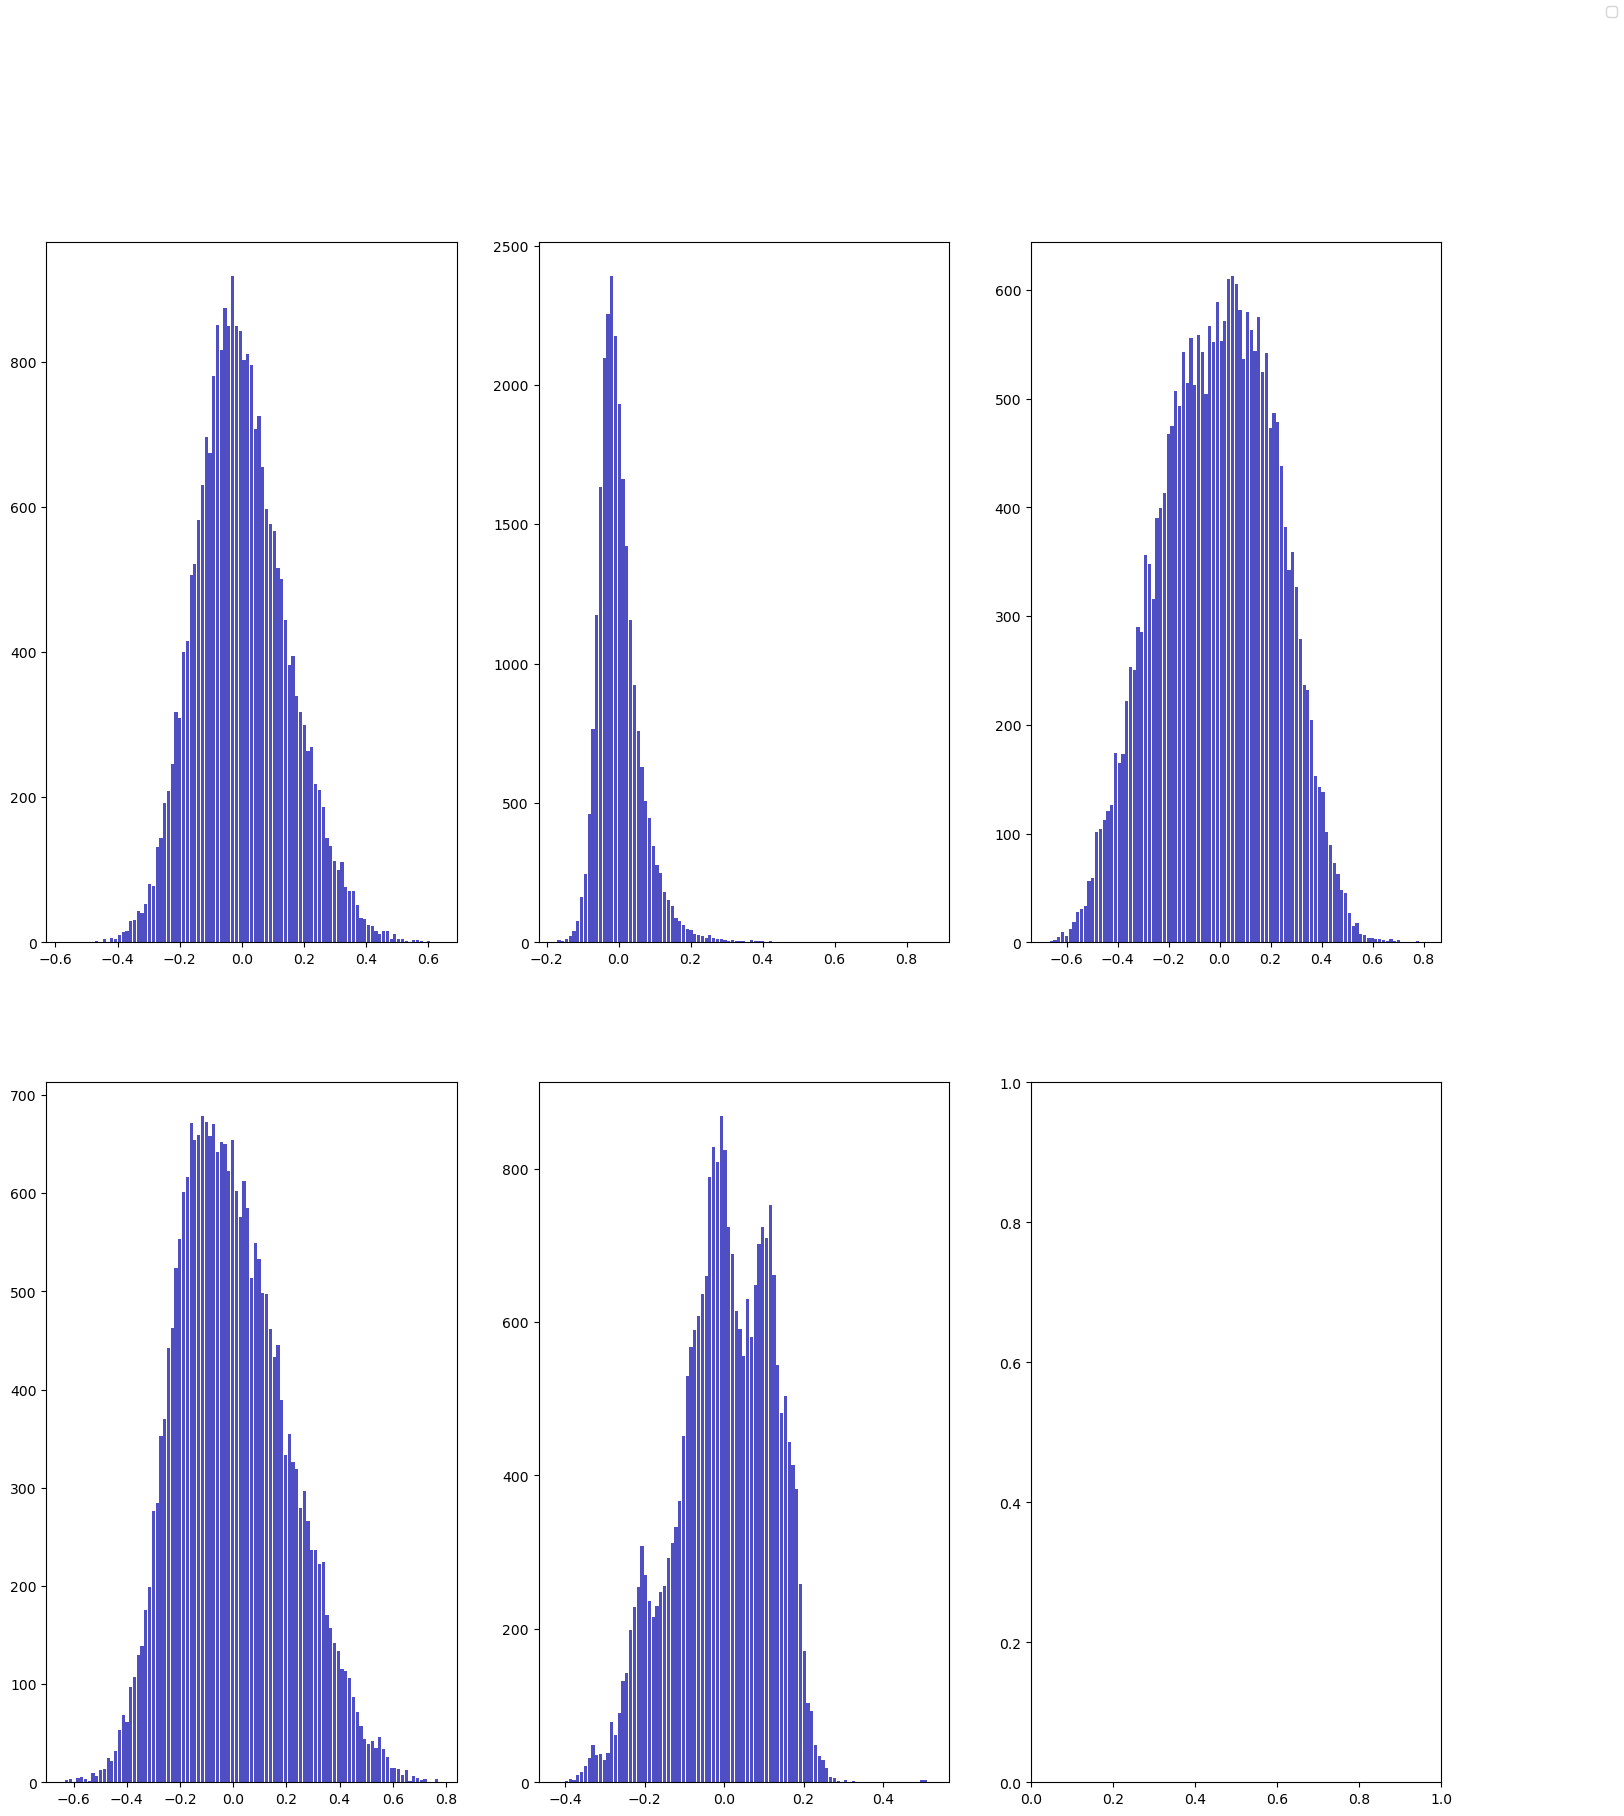

In [51]:
import matplotlib.pyplot as plt


params = [
    'danceability',
    'energy',
    'loudness',
    'tempo',
    'valence',
]


ax, subplots = plt.subplots(2, 3)
ax.set_size_inches(18, 20) 
for j in range(len(params)):
    xp = []
    xr = []
    with torch.no_grad():
        for batch in test_loader[i]:
                # print(len(batch))
                X, y = batch
                output = cm(X.to(DEVICE).to(torch.float32))
                # print(output)
                for idx, res in enumerate(output):
                    xp.append(res[j].cpu())
                    xr.append(y[idx][j])
                    # _sum += acc(np.array(res.cpu()), np.array(y[idx]))
                    # av += squared_sum(np.array(y[idx]))
                    # num += 1
    xp = np.array(xp)
    xr = np.array(xr)
    v, b = np.histogram(xp - xr, bins=100)
    # vr, br = np.histogram(xr, bins=100)
    # plt.scatter(b[:-1], v, label="pred")
    # print(j / 2, j % 2)
    subplots[j % 2][j // 2].hist(xp - xr, b[:-1], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    

# ax, s = plt.subplots()
# ax.set_size_inches(18, 20) 
# v, b = np.histogram(xp - xr, bins=100)
# # vr, br = np.histogram(xr, bins=100)
# # plt.scatter(b[:-1], v, label="pred")
# plt.hist(xp - xr, b[:-1], color='#0504aa',
                            # alpha=0.7, rwidth=0.85)
# plt.plot(br[:-1], vr, label="real")
# plt.plot(range(len(xr[:100])), np.array(xr[:100]) - np.array(xp[:100]), label="real")
# plt.plot(range(len(xp[:100])), xp[:100], label="pred")
ax.legend()
plt.show()

In [ ]:
p = Plot()

In [52]:
def test():
    def calc(a, b):
        return (a - b) ** 2

    def squared_sum(a):
        return np.sum(a ** 2)
        return sum([el **2 for el in a])

    def acc(a, b):
        assert len(a) == len(b)
        return np.sqrt(np.sum([
            (a - b)**2
        ]))
        numerator = np.sum(a * b)
        denominator = np.sqrt(squared_sum(a) * squared_sum(b))
        if (denominator == 0):
            return -1
        return (numerator / float(denominator))


    for i in range(len(tnames)):
        print(f"Testing {tnames[i]}...")
        _sum = 0
        num = 0
        mx = 0
        av = 0
        with torch.no_grad():
            for batch in test_loader[i]:
                # print(len(batch))
                X, y = batch
                output = cm(X.to(DEVICE).to(torch.float32))
                # output = regr_2.predict(X)
                # print(output)
                for idx, res in enumerate(output):
                    # print(res, y[idx])
                    # res *= -1
                    ta = acc(np.array(res.cpu()), np.array(y[idx]))
                    if ta >= 0:
                        # print(ta)
                        _sum += ta
                        av += np.sqrt(squared_sum(np.array(y[idx])))
                        num += 1


        print("Average distance: ", _sum/num)
        print("Average value: ", av / num)
if __name__ == "__main__":
    test()


Testing multi-qa-mpnet-base-dot-v1...
Average distance:  0.33747032202102006
Average value:  1.1638369516935094


In [ ]:
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
print(np.sum(a ** 2))

14


In [ ]:
# print(os.path.join(config.SAVE_DIR, f"{config.MODEL_NAME}-{name}-conv-no-bad.pt"))
# torch.save(cm.state_dict(), os.path.join(config.SAVE_DIR, f"{config.MODEL_NAME}-{name}-conv-no-bad.pt"))

C:/Users/dannu/PycharmProjects/Practice/MoodSongsSearch/src/content/MoodSongs\modelScaleLessLayers-multi-qa-mpnet-base-dot-v1-conv-no-bad.pt


In [ ]:
n = 100
data = test_set[:n + 1]
print(data[0][1])
import random
random.shuffle(data)
res = [0 for i in range(len(data[0][1]))]
tr = [0 for i in range(len(data[0][1]))]
with torch.no_grad():
    for i in range(n):
        # print(cm(torch.from_numpy(data[i][0]).view(-1, 1, 24, 32).to(DEVICE).to(torch.float32)))
        for i2 in range(i + 1, n):
            for j in range(len(data[0][1])):
                # print(cm(torch.from_numpy(data[i + 1][0]).view(-1, 1, 24, 32).to(DEVICE).to(torch.float32))[0][5])
                res[j] += abs((cm(torch.from_numpy(data[i2][0]).view(-1, 1, 24, 32).to(DEVICE).to(torch.float32)) - cm(torch.from_numpy(data[i][0]).view(-1, 1, 24, 32).to(DEVICE).to(torch.float32)))[0][j])
                tr[j] += abs((data[i2][1] - data[i][1])[j])
        # print(m(torch.from_numpy(data[i + 1][0])) - m(torch.from_numpy(data[i][0])))
for el in zip(res, tr):
    print(2 * el[0] / ((n - 1) * n), 2 * el[1] / (n * (n - 1)))

[0]
tensor(0.1887, device='cuda:0') 0.3981818181818182


### Merging lyrics and songs with vectors (?? I hope i won't need that in next version)

In [ ]:
merged = []

for el, vec in zip(song_data, vecs):
    song, artist, meta = el[0], el[1], vec[1]
    merged.append({'song': song,
                   'artist': artist,
                   'meta': meta})

In [ ]:
len(merged)

11559

In [ ]:
for i in range(len(merged)):  # convert to list for serialization
    merged[i]['meta'] = list(map(float, merged[i]['meta']))

In [ ]:
with open("meta+song.json", 'w') as f:
    json.dump(merged, f)